## Model Building - Binary Classification
1. Logistic Regression
2. Random Forest
3. XGBoost

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score

# Set seed to unify training and testing datasets from various models
np.random.seed(666)

### Preparing dataset for modeling

In [2]:
# Read in datasets
data_for_model = pd.read_csv('modeling_data_v2.csv')
oot_data = pd.read_csv('oot_data_v2.csv')

In [3]:
data_for_model.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781036 entries, 0 to 1781035
Data columns (total 119 columns):
HASHED_ATOM_CUSTOMER_ID                        1781036 non-null object
OS_TYPE_e                                      1781036 non-null object
PRODUCTION_ID                                  1781036 non-null int64
RATINGS                                        1781036 non-null int64
MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER         1781036 non-null int64
MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS    1781036 non-null int64
USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES           1781036 non-null float64
WANT_TO_SEE_CLICKS                             1781036 non-null int64
TRAILER_VIEWS                                  1781036 non-null int64
TICKETS                                        1781036 non-null float64
RELEASE_DATE                                   1781036 non-null object
DATE                                           1781036 non-null object
mean_HASHED_ATOM_CUSTOMER_ID_1d_pages 

In [4]:
# Drop variable TICKETS_CLASS 
data_binary = data_for_model.drop(columns = ['TICKETS_CLASS'])

In [5]:
# Check unique values in dependent variable TICKETS
data_binary['TICKETS'].unique()

array([  0.,   1.,   2.,   8.,   4.,   3.,   5.,   6.,   7.,  20.,  10.,
         9.,  12.,  18.,  37.,  15.,  16.,  22.,  11.,  24.,  13.,  14.,
        88., 138., 140.,  30.,  42.,  21., 100.,  80., 120.,  60., 130.,
        90.,  70.,  23.,  32.,  51.,  38.,  25.,  27.,  26.,  29.,  17.,
        19.,  28.,  40.,  46.,  74.,  48.,  71.,  36.,  34.,  50.,  53.,
        65.,  66.,  44.])

In [6]:
# Replace all values > 0 to 1
data_binary['TICKETS'] = data_binary['TICKETS'].apply(lambda x: 1 if x > 0 else x)

In [7]:
# Check replacement correctness
data_binary['TICKETS'].unique()

array([0., 1.])

In [8]:
# Deal with categorical variables

## Drop useless columns
data_binary.drop(columns = ['PRODUCTION_ID','RELEASE_DATE','DATE','HASHED_ATOM_CUSTOMER_ID'], inplace = True)

In [9]:
## One-hot encoding for 'WEEKDAY_OF_ENGAGEMENT','OS_TYPE_e'
data_binary = pd.get_dummies(data_binary, prefix_sep = '_', columns = ['WEEKDAY_OF_ENGAGEMENT','OS_TYPE_e'])

In [10]:
## Convert DATE_TO_RELEASE to numeric
data_binary["DATE_TO_RELEASE"]=data_binary["DATE_TO_RELEASE"].str.replace('+','')
data_binary["DATE_TO_RELEASE"]=data_binary["DATE_TO_RELEASE"].str.replace(' days 00:00:00.000000000','').astype(int)

In [11]:
data_binary.info(verbose = True, null_counts = True) #121 independent variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781036 entries, 0 to 1781035
Data columns (total 122 columns):
RATINGS                                        1781036 non-null int64
MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER         1781036 non-null int64
MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS    1781036 non-null int64
USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES           1781036 non-null float64
WANT_TO_SEE_CLICKS                             1781036 non-null int64
TRAILER_VIEWS                                  1781036 non-null int64
TICKETS                                        1781036 non-null float64
mean_HASHED_ATOM_CUSTOMER_ID_1d_pages          1781036 non-null float64
mean_HASHED_ATOM_CUSTOMER_ID_3d_pages          1781036 non-null float64
mean_HASHED_ATOM_CUSTOMER_ID_7d_pages          1781036 non-null float64
mean_HASHED_ATOM_CUSTOMER_ID_14d_pages         1781036 non-null float64
mean_HASHED_ATOM_CUSTOMER_ID_30d_pages         1781036 non-null float64
max_HASHED_ATOM_CUSTOMER_ID_1d_p

### Repeat the process for oot dataset

In [12]:
# Drop variable TICKETS_CLASS 
oot_data = oot_data.drop(columns = ['TICKETS_CLASS'])

In [13]:
# Check unique values in dependent variable TICKETS
oot_data['TICKETS'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  9., 12.,  5.,  6., 10.,  7.,  8., 60.,
       18., 11., 17., 14., 13., 20., 24., 29., 16., 22., 28., 25., 15.,
       54., 19., 34., 36., 68., 50.])

In [14]:
# Replace all values > 0 to 1
oot_data['TICKETS'] = oot_data['TICKETS'].apply(lambda x: 1 if x > 0 else x)

In [15]:
# Check replacement correctness
oot_data['TICKETS'].unique()

array([0., 1.])

In [16]:
# Deal with categorical variables

## Drop useless columns
oot_data.drop(columns = ['PRODUCTION_ID','RELEASE_DATE','DATE','HASHED_ATOM_CUSTOMER_ID'], inplace = True)

In [17]:
## One-hot encoding for 'WEEKDAY_OF_ENGAGEMENT','OS_TYPE_e'
oot_data = pd.get_dummies(oot_data, prefix_sep = '_', columns = ['WEEKDAY_OF_ENGAGEMENT','OS_TYPE_e'])

In [18]:
## Convert DATE_TO_RELEASE to numeric
oot_data["DATE_TO_RELEASE"] = oot_data["DATE_TO_RELEASE"].str.replace('+','')
oot_data["DATE_TO_RELEASE"] = oot_data["DATE_TO_RELEASE"].str.replace(' days 00:00:00.000000000','').astype(int)

### Dividing training and testing sets
Ramdomly divide dataset (excluding oot dataset) into training (70%) and testing (30%) sets


In [19]:
### Set dependent variable
y = data_binary.TICKETS

### Drop dependent variable
data_binary.drop(columns = ['TICKETS'], inplace = True)

### Split the dataset into training and testing
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(data_binary, y, test_size = 0.3)
print (X_binary_train.shape, y_binary_train.shape)
print (X_binary_test.shape, y_binary_test.shape)

(1246725, 121) (1246725,)
(534311, 121) (534311,)


In [20]:
### Set dependent variable for oot
oot_y = oot_data.TICKETS
oot_X = oot_data.drop(columns = ['TICKETS'])

### Feature Selection

#### Recursive Feature Elimination

In [22]:
# Implementing the Recursive Feature Elimination method of feature ranking via the use of basic Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

start_time = time.time()
rfe = RFE(logreg, n_features_to_select = 40, verbose = 3)
rfe = rfe.fit(X_binary_train, y_binary_train.values.ravel())
print("--- %s seconds ---" % (time.time() - start_time))

print(rfe.support_) # True refer to the columns that are selected
print(rfe.ranking_) # rank 1 means the column is selected

Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fittin

In [23]:
print(len(X_binary_train.columns[rfe.support_]), "features are selected after the Recursive Feature Elimination (RFE):")
print(X_binary_train.columns[rfe.support_].values)

40 features are selected after the Recursive Feature Elimination (RFE):
['RATINGS' 'TRAILER_VIEWS' 'mean_HASHED_ATOM_CUSTOMER_ID_1d_pages'
 'max_HASHED_ATOM_CUSTOMER_ID_1d_pages'
 'max_HASHED_ATOM_CUSTOMER_ID_7d_pages'
 'count_HASHED_ATOM_CUSTOMER_ID_1d_pages'
 'count_HASHED_ATOM_CUSTOMER_ID_30d_pages'
 'count_HASHED_ATOM_CUSTOMER_ID_28d_pages'
 'mean_HASHED_ATOM_CUSTOMER_ID_1d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_3d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_7d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_14d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_28d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_35d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_42d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_49d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_56d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_1d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_3d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_7d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_14d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_35d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_49d_ratings'
 'med

In [141]:
# Inputing only columns that are selected by RFE into the model
X_train_lr = X_binary_train[X_binary_train.columns[rfe.support_]]
X_test_lr = X_binary_test[X_binary_test.columns[rfe.support_]]
oot_X_lr = oot_X[oot_X.columns[rfe.support_]]

### Logistic Regression Model Fitting

In [85]:
# Model Fitting
logreg = LogisticRegression()
logreg.fit(X_train_lr, y_binary_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
# Cross-validation on training
logreg_scores = cross_val_score(logreg, X_train_lr, y_binary_train, cv = 5, scoring = 'f1')
print(logreg_scores.mean()) #0.39679376499438873

/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.39679376499438873


In [88]:
# Evaluate model accuracy on test set
lr_predictions = logreg.predict(X_test_lr)

print(classification_report(y_binary_test, lr_predictions))

             precision    recall  f1-score   support

        0.0       0.86      0.99      0.92    440791
        1.0       0.82      0.26      0.40     93520

avg / total       0.86      0.86      0.83    534311



In [145]:
# Evaluate model accuracy on oot set
lr_predictions_oot = logreg.predict(oot_X_lr)

print(classification_report(oot_y, lr_predictions_oot))

             precision    recall  f1-score   support

        0.0       0.75      0.52      0.62    327793
        1.0       0.28      0.51      0.36    117246

avg / total       0.62      0.52      0.55    445039



In [51]:
# Confusion Matrix
predictions = logreg.predict(X_test_lr)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_binary_test, predictions)

array([[435355,   5436],
       [ 69040,  24480]])

### Random Forest
1. Include all variables in RF model to output feature importance
2. Use only top 40 variables to build model and predict on test set
3. Tune parameters
3. Final Predictions on both test and oot set

In [89]:
# use rf's build-in feature selection
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, verbose = 3)
RF.fit(X_binary_train, y_binary_train)

building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=3, warm_start=False)

In [90]:
# Predicting the test set results
rf_predictions = RF.predict(X_binary_test)

# Evaluate model accuracy
## n_estimators: 100->0.5
from sklearn.metrics import classification_report
print(classification_report(y_binary_test, rf_predictions))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.8s finished


             precision    recall  f1-score   support

        0.0       0.93      0.95      0.94    440791
        1.0       0.73      0.64      0.68     93520

avg / total       0.89      0.90      0.89    534311



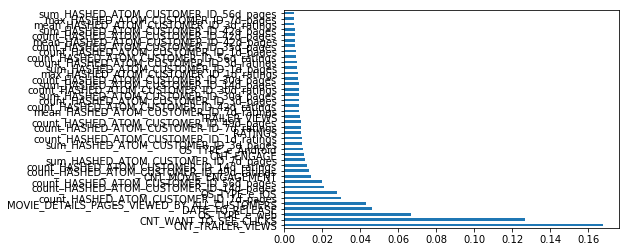

In [97]:
# Plot the feature importance
feat_importances = pd.Series(RF.feature_importances_, index = X_binary_train.columns)
feat_importances.nlargest(40).plot(kind = 'barh')
plt.show()

In [92]:
print("Rank top 40 in random forest feature importance:")
print(X_binary_train.columns[rfe.support_].values)

Rank top 40 in random forest feature importance:
['RATINGS' 'TRAILER_VIEWS' 'mean_HASHED_ATOM_CUSTOMER_ID_1d_pages'
 'max_HASHED_ATOM_CUSTOMER_ID_1d_pages'
 'max_HASHED_ATOM_CUSTOMER_ID_7d_pages'
 'count_HASHED_ATOM_CUSTOMER_ID_1d_pages'
 'count_HASHED_ATOM_CUSTOMER_ID_30d_pages'
 'count_HASHED_ATOM_CUSTOMER_ID_28d_pages'
 'mean_HASHED_ATOM_CUSTOMER_ID_1d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_3d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_7d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_14d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_28d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_35d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_42d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_49d_ratings'
 'mean_HASHED_ATOM_CUSTOMER_ID_56d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_1d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_3d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_7d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_14d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_35d_ratings'
 'max_HASHED_ATOM_CUSTOMER_ID_49d_ratings'
 'median_HASHED_ATOM_CUSTOME

In [108]:
import pandas as pd
feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = X_binary_train.columns,
                                   columns = ['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
CNT_TRAILER_VIEWS,0.167823
CNT_WANT_TO_SEE_CLICKS,0.126579
OS_TYPE_e_web,0.066889
DATE_TO_RELEASE,0.046229
MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS,0.043304
count_HASHED_ATOM_CUSTOMER_ID_7d_pages,0.029826
OS_TYPE_e_iOS,0.027736
count_HASHED_ATOM_CUSTOMER_ID_14d_pages,0.020947
count_HASHED_ATOM_CUSTOMER_ID_56d_pages,0.019982
CNT_MOVIE_ENGAGEMENT,0.014408


In [109]:
# Output feature importance file
# feature_importances.to_csv('rf feature importance.csv')

In [98]:
# # Use only top 40 variables in the model
# feat_importances.nlargest(40).index
X_train_rf = X_binary_train[feat_importances.nlargest(40).index]
X_test_rf = X_binary_test[feat_importances.nlargest(40).index]
oot_X_rf = oot_X[feat_importances.nlargest(40).index]

In [99]:
# Cross-validation
from sklearn.cross_validation import cross_val_score
rf_scores = cross_val_score(RF, X_train_rf, y_binary_train, cv = 5, scoring = 'f1')
print(rf_scores.mean()) #0.6844243574243999

building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.9s finished


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.8s finished


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.9s finished


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.5s finished


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


0.6844243574243999


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.0s finished


In [31]:
# fit to top 40 features
RF.fit(X_train_rf, y_binary_train)

building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.0s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=3, warm_start=False)

In [32]:
# Predicting the test set results
predictions = RF.predict(X_test_rf)

# Evaluate model accuracy
## n_estimators: 100->0.5
from sklearn.metrics import classification_report
print(classification_report(y_binary_test, predictions))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


             precision    recall  f1-score   support

        0.0       0.93      0.95      0.94    440791
        1.0       0.73      0.65      0.68     93520

avg / total       0.89      0.90      0.89    534311



[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.4s finished


In [33]:
# Predicting the oot set results
oot_predictions = RF.predict(oot_X_rf)

# Evaluate model accuracy
## n_estimators: 100->0.5
from sklearn.metrics import classification_report
print(classification_report(oot_y, oot_predictions))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


             precision    recall  f1-score   support

        0.0       0.80      0.98      0.88    327793
        1.0       0.82      0.32      0.46    117246

avg / total       0.81      0.80      0.77    445039



[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.9s finished


### RF Randomized Search for parameters
1. **N_estimators**: n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably
2. **max_depth**: max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. 
3. **min_samples_split**: min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node.
4. **min_samples_leaf**: min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.
5. **max_features**: max_features represents the number of features to consider when looking for the best split.

In [113]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 210, num = 6)]

# Number of features to consider at every split
max_features = [round(x, 2) for x in np.linspace(start = 0.2, stop = 1, num = 5)]
max_features.append('sqrt')
## Empirical good default values are max_features=n_features for regression problems, 
## and max_features = sqrt(n_features) for classification tasks

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 50, 90, 130, 170, 210], 'max_features': [0.2, 0.4, 0.6, 0.8, 1.0, 'sqrt'], 'max_depth': [5, 16, 27, 38, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [114]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF = RandomForestClassifier()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose = 2,
                               scoring = 'f1',
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_rf, y_binary_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=130, min_samples_split=2, min_samples_leaf=1, max_features=0.6, max_depth=None, bootstrap=True 
[CV] n_estimators=130, min_samples_split=2, min_samples_leaf=1, max_features=0.6, max_depth=None, bootstrap=True 
[CV] n_estimators=130, min_samples_split=2, min_samples_leaf=1, max_features=0.6, max_depth=None, bootstrap=True 
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_features=0.8, max_depth=27, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_features=0.8, max_depth=27, bootstrap=False, total=16.9min
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_features=0.8, max_depth=27, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=2, min_samples_leaf=1, max_features=0.6, max_depth=None, bootstrap=True, total=26.1min
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_features=0.8, max_depth=27, bootstrap=False 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 121.5min


[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=0.6, max_depth=5, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=0.6, max_depth=5, bootstrap=False, total=  44.6s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=0.6, max_depth=5, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=0.6, max_depth=5, bootstrap=False, total=  43.5s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=0.6, max_depth=5, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=0.6, max_depth=5, bootstrap=False, total=  44.2s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=0.6, max_depth=5, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=0.6, max_depth=5, bootstrap=True, total= 3.3min
[CV] n_estimators=50, min_samples_split=5, min_s

[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=0.8, max_depth=50, bootstrap=False, total=16.4min
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=0.8, max_depth=50, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=0.8, max_depth=50, bootstrap=False, total=16.1min
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=0.8, max_depth=38, bootstrap=False 
[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=0.4, max_depth=16, bootstrap=True, total=24.9min
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=0.8, max_depth=38, bootstrap=False 
[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=0.4, max_depth=16, bootstrap=True, total=24.5min
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=0.8, max_depth=38, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=5, 

[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=27, bootstrap=True 
[CV]  n_estimators=170, min_samples_split=5, min_samples_leaf=1, max_features=0.2, max_depth=27, bootstrap=False, total=14.6min
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=27, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=27, bootstrap=True, total= 5.3min
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=27, bootstrap=True 
[CV]  n_estimators=170, min_samples_split=5, min_samples_leaf=1, max_features=0.2, max_depth=27, bootstrap=False, total=14.5min
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=2, max_features=1.0, max_depth=None, bootstrap=True 
[CV]  n_estimators=170, min_samples_split=5, min_samples_leaf=1, max_features=0.2, max_depth=27, bootstrap=False, total=14.5min
[CV] n_estimators=210, min_samples_

[CV]  n_estimators=170, min_samples_split=2, min_samples_leaf=1, max_features=0.4, max_depth=38, bootstrap=False, total=25.9min
[CV] n_estimators=170, min_samples_split=5, min_samples_leaf=4, max_features=0.6, max_depth=50, bootstrap=True 
[CV]  n_estimators=170, min_samples_split=2, min_samples_leaf=1, max_features=0.4, max_depth=38, bootstrap=False, total=26.1min
[CV] n_estimators=170, min_samples_split=5, min_samples_leaf=4, max_features=0.2, max_depth=5, bootstrap=False 
[CV]  n_estimators=170, min_samples_split=5, min_samples_leaf=4, max_features=0.6, max_depth=50, bootstrap=True, total=27.5min
[CV] n_estimators=170, min_samples_split=5, min_samples_leaf=4, max_features=0.2, max_depth=5, bootstrap=False 
[CV]  n_estimators=170, min_samples_split=5, min_samples_leaf=4, max_features=0.2, max_depth=5, bootstrap=False, total= 4.6min
[CV] n_estimators=170, min_samples_split=5, min_samples_leaf=4, max_features=0.2, max_depth=5, bootstrap=False 
[CV]  n_estimators=170, min_samples_split=

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 648.3min


[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=0.4, max_depth=27, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=0.4, max_depth=27, bootstrap=True, total=10.4min
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=0.4, max_depth=27, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=5, min_samples_leaf=1, max_features=1.0, max_depth=38, bootstrap=False, total=30.7min
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=0.6, max_depth=27, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=0.6, max_depth=27, bootstrap=False, total= 2.1min
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=0.6, max_depth=27, bootstrap=False 
[CV]  n_estimators=90, min_samples_split=5, min_samples_leaf=1, max_features=1.0, max_depth=38, bootstrap=False, total=30.8min
[CV] n_estimators=10, min_samples_split=2, m

[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=0.4, max_depth=38, bootstrap=True, total= 6.0min
[CV] n_estimators=90, min_samples_split=2, min_samples_leaf=2, max_features=0.8, max_depth=27, bootstrap=False 
[CV]  n_estimators=90, min_samples_split=2, min_samples_leaf=2, max_features=0.8, max_depth=27, bootstrap=False, total=24.1min
[CV] n_estimators=90, min_samples_split=2, min_samples_leaf=2, max_features=0.8, max_depth=27, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=2, min_samples_leaf=4, max_features=1.0, max_depth=16, bootstrap=False, total=36.3min
[CV] n_estimators=90, min_samples_split=2, min_samples_leaf=2, max_features=0.8, max_depth=27, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=2, min_samples_leaf=4, max_features=1.0, max_depth=16, bootstrap=False, total=36.1min
[CV] n_estimators=210, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=130, min_samples_spl

[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=0.2, max_depth=38, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=0.2, max_depth=38, bootstrap=False, total=  54.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=0.2, max_depth=38, bootstrap=False 
[CV]  n_estimators=210, min_samples_split=10, min_samples_leaf=1, max_features=0.8, max_depth=27, bootstrap=True, total=46.9min
[CV] n_estimators=90, min_samples_split=2, min_samples_leaf=2, max_features=0.6, max_depth=None, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=0.2, max_depth=38, bootstrap=False, total=  59.9s
[CV] n_estimators=90, min_samples_split=2, min_samples_leaf=2, max_features=0.6, max_depth=None, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=0.2, max_depth=38, bootstrap=False, total=  58.2s
[CV] n_estimators=90, min_samples_split=2

[CV]  n_estimators=130, min_samples_split=10, min_samples_leaf=4, max_features=0.6, max_depth=38, bootstrap=True, total=22.3min
[CV] n_estimators=130, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=130, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total= 8.1min
[CV] n_estimators=130, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=170, min_samples_split=10, min_samples_leaf=2, max_features=0.8, max_depth=50, bootstrap=True, total=39.7min
[CV] n_estimators=130, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=130, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total= 9.5min
[CV] n_estimators=170, min_samples_split=2, min_samples_leaf=1, max_features=0.6, max_depth=16, bootstrap=True 
[CV]  n_estimators=130, min

[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=0.8, max_depth=16, bootstrap=False 
[CV]  n_estimators=90, min_samples_split=5, min_samples_leaf=1, max_features=0.2, max_depth=None, bootstrap=True, total= 6.5min
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=0.8, max_depth=16, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=0.8, max_depth=16, bootstrap=False, total=11.7min
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=4, max_features=0.4, max_depth=5, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=0.8, max_depth=16, bootstrap=False, total=11.6min
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=4, max_features=0.4, max_depth=5, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=2, min_samples_leaf=2, max_features=0.8, max_depth=27, bootstrap=True, total=28.2min
[CV] n_estimators=90, min_samples_split=10,

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 1156.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 50, 90, 130, 170, 210], 'max_features': [0.2, 0.4, 0.6, 0.8, 1.0, 'sqrt'], 'max_depth': [5, 16, 27, 38, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=2)

In [115]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 27,
 'max_features': 0.4,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 90}

In [117]:
# Evaluate the new parameters by predicting the test set results
best_random = rf_random.best_estimator_
best_random_prediction = best_random.predict(X_test_rf)

# Evaluate model accuracy on testing set
from sklearn.metrics import classification_report
print(classification_report(y_binary_test, best_random_prediction))

             precision    recall  f1-score   support

        0.0       0.92      0.97      0.95    440791
        1.0       0.82      0.63      0.71     93520

avg / total       0.91      0.91      0.91    534311



In [129]:
# Evaluate model accuracy on OOT
best_random_prediction_oot = best_random.predict(oot_X_rf)

from sklearn.metrics import classification_report
print(classification_report(oot_y, best_random_prediction_oot))

             precision    recall  f1-score   support

        0.0       0.80      0.98      0.88    327793
        1.0       0.84      0.31      0.46    117246

avg / total       0.81      0.80      0.77    445039



In [130]:
# Evaluate model accuracy on training set
best_random_prediction_train = best_random.predict(X_train_rf)

from sklearn.metrics import classification_report
print(classification_report(y_binary_train, best_random_prediction_train))

             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97   1026842
        1.0       0.93      0.73      0.82    219883

avg / total       0.94      0.94      0.94   1246725



### RF Grid Search for Parameters

In [121]:
## Not fully finished due to limited computation power and time. 
## Running 100 combinations with 3 fold cv costs 20 hours.

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40],
    'max_features': [0.2, 0.4, 'sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [70, 90, 110]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid,
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 3,
                           scoring = 'f1')

# Fit the random search model
grid_search.fit(X_train_rf, y_binary_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=8, n_estimators=70 
[CV] bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=8, n_estimators=70 
[CV] bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=8, n_estimators=70 
[CV] bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=8, n_estimators=90 
[CV]  bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=8, n_estimators=70, score=0.7074475293142343, total= 5.9min
[CV] bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=8, n_estimators=90 
[CV]  bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_samples_split=8, n_estimators=70, score=0.7087885003736742, total= 5.9min
[CV] bootstrap=True, max_depth=20, max_features=0.2, min_samples_leaf=1, min_s

KeyboardInterrupt: 

### GBDT (not included in the end because of similarity with XGBoost, which performs better and faster than GBDT)
1. Include all variables in GDBT model to output feature importance
2. Use only top 40 variables to build model and predict on test set
3. Tune parameters
3. Final Predictions on both test and oot set

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
GDBT = GradientBoostingClassifier(loss = 'deviance',
                           learning_rate = 0.1,
                           n_estimators = 50,
                           subsample = 1.0,
                           criterion = 'friedman_mse',
                           min_samples_split = 2,
                           min_samples_leaf = 1,
                           min_weight_fraction_leaf = 0.0,
                           max_depth = 3, verbose = 3
#                            min_impurity_decrease = 0.0,
#                            min_impurity_split = None,
#                            init = None,
#                            random_state = None,
#                            max_features = None,
#                            verbose = 0,
#                            max_leaf_nodes = None,
#                            warm_start = False,
#                            presort = 'auto'.
#                            validation_fraction = 0.1,
#                            n_iter_no_change = None,
#                            tol = 0.0001
                           )
GDBT.fit(X_binary_train, y_binary_train)

      Iter       Train Loss   Remaining Time 
         1           0.8696            6.59m
         2           0.8261            6.27m
         3           0.7921            6.23m
         4           0.7588            6.13m
         5           0.7299            6.17m
         6           0.7088            6.02m
         7           0.6877            5.82m
         8           0.6703            5.56m
         9           0.6529            5.47m
        10           0.6406            5.24m
        11           0.6273            5.06m
        12           0.6145            4.97m
        13           0.6057            4.79m
        14           0.5954            4.65m
        15           0.5848            4.54m
        16           0.5786            4.36m
        17           0.5718            4.23m
        18           0.5637            4.12m
        19           0.5592            3.98m
        20           0.5535            3.84m
        21           0.5477            3.70m
        2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=3,
              warm_start=False)

In [103]:
# Predicting the test set results
gdbt_predictions = GDBT.predict(X_binary_test)

# Evaluate model accuracy
## n_estimators: 100->0.5
print(classification_report(y_binary_test, predictions))

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94    440791
        1.0       0.84      0.54      0.66     93520

avg / total       0.90      0.90      0.89    534311



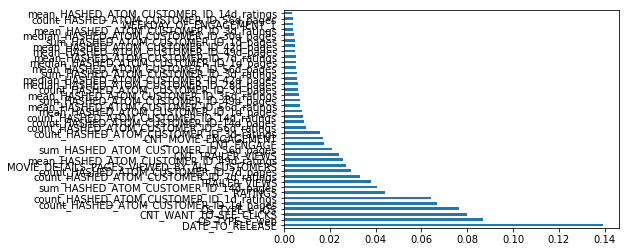

In [104]:
# Plot the feature importance
feat_importances = pd.Series(GDBT.feature_importances_, index = X_binary_train.columns)
feat_importances.nlargest(40).plot(kind = 'barh')
plt.show()

In [105]:
# Use only top 40 features in the model
# feat_importances.nlargest(40).index
X_train_gdbt = X_binary_train[feat_importances.nlargest(40).index]
X_test_gdbt = X_binary_test[feat_importances.nlargest(40).index]
oot_X_gdbt = oot_X[feat_importances.nlargest(40).index]

In [107]:
# Cross-validation
from sklearn.cross_validation import cross_val_score
gbdt_scores = cross_val_score(GDBT, X_train_gdbt, y_binary_train, cv = 5, scoring = 'f1')
print('Average f1 score for GBDT models is', gbdt_scores.mean()) #0.6585828694214062

      Iter       Train Loss   Remaining Time 
         1           0.8695            1.83m
         2           0.8259            1.78m
         3           0.7919            1.73m
         4           0.7586            1.70m
         5           0.7296            1.69m
         6           0.7085            1.65m
         7           0.6874            1.61m
         8           0.6700            1.55m
         9           0.6525            1.53m
        10           0.6400            1.49m
        11           0.6276            1.45m
        12           0.6136            1.44m
        13           0.6050            1.39m
        14           0.5948            1.36m
        15           0.5842            1.34m
        16           0.5781            1.31m
        17           0.5707            1.28m
        18           0.5626            1.25m
        19           0.5581            1.21m
        20           0.5518            1.18m
        21           0.5471            1.15m
        2

        29           0.5210           48.43s
        30           0.5179           46.06s
        31           0.5154           43.81s
        32           0.5118           41.74s
        33           0.5101           39.27s
        34           0.5077           36.92s
        35           0.5049           34.77s
        36           0.5031           32.41s
        37           0.5012           30.10s
        38           0.4989           27.88s
        39           0.4976           25.48s
        40           0.4963           23.14s
        41           0.4944           20.88s
        42           0.4934           18.55s
        43           0.4920           16.26s
        44           0.4903           13.93s
        45           0.4891           11.59s
        46           0.4881            9.25s
        47           0.4870            6.93s
        48           0.4857            4.67s
        49           0.4846            2.33s
        50           0.4838            0.00s
      Iter

In [40]:
# fit to top 40 features
GDBT.fit(X_train_gdbt, y_binary_train)

      Iter       Train Loss   Remaining Time 
         1           0.8696            1.79m
         2           0.8262            1.73m
         3           0.7922            1.74m
         4           0.7589            1.73m
         5           0.7300            1.74m
         6           0.7090            1.69m
         7           0.6879            1.65m
         8           0.6705            1.58m
         9           0.6532            1.59m
        10           0.6409            1.56m
        11           0.6278            1.52m
        12           0.6150            1.48m
        13           0.6062            1.43m
        14           0.5959            1.40m
        15           0.5853            1.38m
        16           0.5791            1.32m
        17           0.5716            1.27m
        18           0.5655            1.23m
        19           0.5588            1.18m
        20           0.5547            1.13m
        21           0.5501            1.09m
        2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=3,
              warm_start=False)

In [46]:
# Predicting the test set results 30 (increasing variables did not increase accuracy)
predictions = GDBT.predict(X_test_gdbt)

# Evaluate model accuracy
## n_estimators: 100->0.5
print(classification_report(y_binary_test, predictions))

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94    440791
        1.0       0.84      0.54      0.66     93520

avg / total       0.90      0.90      0.89    534311



### XGBoost

In [147]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_binary_train, y_binary_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [148]:
# Predicting the test set results
predictions = xgb.predict(X_binary_test)

# Evaluate model accuracy
## n_estimators: 100->0.5
print(classification_report(y_binary_test, predictions))

/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94    440791
        1.0       0.83      0.57      0.67     93520

avg / total       0.90      0.90      0.90    534311



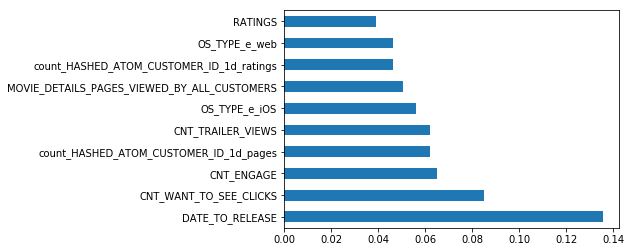

In [149]:
# Plot the feature importance
feat_importances = pd.Series(xgb.feature_importances_, index = X_binary_train.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [111]:
# Use only top 40 features in the model
# feat_importances.nlargest(40).index
X_train_xgb = X_binary_train[feat_importances.nlargest(40).index]
X_test_xgb = X_binary_test[feat_importances.nlargest(40).index]
oot_X_xgb = oot_X[feat_importances.nlargest(40).index]

In [112]:
# Cross-validation
from sklearn.cross_validation import cross_val_score
xgb_scores = cross_val_score(xgb, X_train_xgb, y_binary_train, cv = 5, scoring = 'f1')
print('Average f1 score for XGBoost models is', xgb_scores.mean()) #0.6748738322686687

/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth 

Average f1 score for GBDT models is 0.6748738322686687


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Random Search for XGBoost

In [126]:
# Diagnose for n_estimators
eval_set = [(X_train_xgb, y_binary_train), (X_test_xgb, y_binary_test)]
eval_metric = ["auc","error"]
xgb.fit(X_train_xgb, y_binary_train, eval_metric = eval_metric, eval_set = eval_set, verbose=True)

[0]	validation_0-auc:0.851636	validation_0-error:0.129109	validation_1-auc:0.851596	validation_1-error:0.128143
[1]	validation_0-auc:0.859533	validation_0-error:0.132326	validation_1-auc:0.859533	validation_1-error:0.131538
[2]	validation_0-auc:0.861932	validation_0-error:0.130242	validation_1-auc:0.861811	validation_1-error:0.129419
[3]	validation_0-auc:0.884502	validation_0-error:0.127627	validation_1-auc:0.884718	validation_1-error:0.127018
[4]	validation_0-auc:0.883363	validation_0-error:0.122874	validation_1-auc:0.8835	validation_1-error:0.122236
[5]	validation_0-auc:0.895753	validation_0-error:0.119552	validation_1-auc:0.896005	validation_1-error:0.118906
[6]	validation_0-auc:0.906227	validation_0-error:0.118234	validation_1-auc:0.906524	validation_1-error:0.117637
[7]	validation_0-auc:0.906771	validation_0-error:0.11881	validation_1-auc:0.907097	validation_1-error:0.11833
[8]	validation_0-auc:0.908001	validation_0-error:0.116857	validation_1-auc:0.908222	validation_1-error:0.116

[73]	validation_0-auc:0.930072	validation_0-error:0.097406	validation_1-auc:0.930202	validation_1-error:0.096975
[74]	validation_0-auc:0.930203	validation_0-error:0.097332	validation_1-auc:0.930333	validation_1-error:0.09691
[75]	validation_0-auc:0.930262	validation_0-error:0.097288	validation_1-auc:0.930402	validation_1-error:0.096816
[76]	validation_0-auc:0.93034	validation_0-error:0.097078	validation_1-auc:0.930473	validation_1-error:0.096618
[77]	validation_0-auc:0.930427	validation_0-error:0.097072	validation_1-auc:0.930557	validation_1-error:0.096588
[78]	validation_0-auc:0.930499	validation_0-error:0.096982	validation_1-auc:0.93063	validation_1-error:0.096543
[79]	validation_0-auc:0.930635	validation_0-error:0.096936	validation_1-auc:0.930757	validation_1-error:0.096468
[80]	validation_0-auc:0.930748	validation_0-error:0.096803	validation_1-auc:0.930862	validation_1-error:0.096324
[81]	validation_0-auc:0.930833	validation_0-error:0.096785	validation_1-auc:0.930944	validation_1-e

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [151]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 1, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 0.9],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.02, 0.03],
    'n_estimators': [80, 100, 300, 500, 800, 1000]
        }

# from sklearn.metrics import f1_score

# # Define f1 score for eval_metric
# def f1_eval(y_pred, dtrain):
#     y_true = dtrain.get_label()
#     err = 1 - f1_score(y_true, np.round(y_pred))
#     return 'f1_err', err

In [152]:
# Build XGB model
xgb = XGBClassifier(objective = 'binary:logistic')

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, 
                               param_distributions = random_grid, 
                               n_iter = 50, 
                               cv = 3, 
                               verbose = 2,
                               scoring = 'f1',
                               n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train_xgb, y_binary_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9 
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9 
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9 
[CV] subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6, total= 2.3min
[CV] subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6, total= 2.2min
[CV] subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6, total= 2.2min
[CV] subsample=0.8, n_estimators=300, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=300, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8, total=13.2min
[CV] subsample=0.8, n_estimators=300, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth 

[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9, total=24.4min
[CV] subsample=0.8, n_estimators=300, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9, total=24.4min
[CV] subsample=0.8, n_estimators=80, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9, total=24.5min
[CV] subsample=0.8, n_estimators=80, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=80, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6, total= 3.4min
[CV] subsample=0.8, n_estimators=80, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=80, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6, total= 3.4min
[CV] subsample=0.8, n_estimators=800, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=80, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6, total= 3.4min
[CV] subsample=0.8, n_estimators=800, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=300, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8, total=13.2min
[CV] subsample=0.8, n_estimators=800, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=300, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8, total=13.3min
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.8, total=28.4min
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.8, total=28.2min
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.8, total=28.5min
[CV] subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9, total= 8.8min
[CV] subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9, total=39.0min
[CV] subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9, total= 8.8min
[CV] subsample=1.0, n_estimators=80, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=80, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0, colsample_bytree=0.9, total= 2.4min
[CV] subsample=1.0, n_estimators=80, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=80, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0, colsample_bytree=0.9, total= 2.4min
[CV] subsample=1.0, n_estimators=80, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9, total= 8.9min
[CV] subsample=0.8, n_estimators=1000, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=80, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0, colsample_bytree=0.9, total= 2.4min
[CV] subsample=0.8, n_estimators=1000, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9, total=38.4min
[CV] subsample=0.8, n_estimators=1000, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0, colsample_bytree=0.9, total=39.0min
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6, total= 4.7min
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6, total= 4.4min
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.03, gamma=0, colsample_bytree=0.6, total= 4.3min
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.4, total=26.6min
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.4, total=26.6min
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.4, total=26.6min
[CV] subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4, total=15.9min
[CV] subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4, total=15.9min
[CV] subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4, total=16.1min
[CV] subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.4 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 132.4min
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.4, total=10.0min
[CV] subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.4, total= 3.1min
[CV] subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.4, total= 3.1min
[CV] subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.4, total= 3.1min
[CV] subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.8, total= 2.6min
[CV] subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.4, total=10.0min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.8, total= 2.7min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=0, colsample_bytree=0.4, total=10.1min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.8, total= 2.7min
[CV] subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth 

[CV]  subsample=0.6, n_estimators=1000, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6, total=20.5min
[CV] subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6, total=20.4min
[CV] subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.6, total=20.5min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.6, total=42.0min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.6, total=44.7min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.6, total=45.0min
[CV] subsample=1.0, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9, total=52.3min
[CV] subsample=1.0, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=1, colsample_bytree=0.6, total=19.0min
[CV] subsample=1.0, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=1, colsample_bytree=0.6, total=19.2min
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.01, gamma=1, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9, total=55.0min
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.01, gamma=1, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.01, gamma=1, colsample_bytree=0.4, total=11.9min
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.01, gamma=1, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=1, colsample_bytree=0.6, total=19.5min
[CV] subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.01, gamma=1, colsample_bytree=0.4, total=11.5min
[CV] subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, learning_rate=0.01, gamma=1, colsample_bytree=0.4, total=11.9min
[CV] subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9, total=56.4min
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4, total=25.3min
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=1, colsample_bytree=0.6, total=14.9min
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4, total=26.6min
[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4, total=27.8min
[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=1, colsample_bytree=0.6, total=14.9min
[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=1, colsample_bytree=0.6, total=14.7min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9, total=19.4min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9, total=17.5min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.9, total=17.1min
[CV] subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9, total= 4.8min
[CV] subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9, total= 4.8min
[CV] subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9, total= 4.7min
[CV] subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.4, total= 2.6min
[CV] subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.4, total= 2.5min
[CV] subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.4, total= 2.6min
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=1, colsample_bytree=0.8, total=35.3min
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=1, colsample_bytree=0.8, total=34.6min
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=1, colsample_bytree=0.8, total=34.4min
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.8, total=20.7min
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.8, total=20.5min
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=5, colsample_bytree=0.8, total=20.7min
[CV] subsample=1.0, n_estimators=1000, min_child_weight=1, max_depth=4, learning_rate=0.02, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4, total=15.7min
[CV] subsample=1.0, n_estimators=1000, min_child_weight=1, max_depth=4, learning_rate=0.02, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4, total=16.3min
[CV] subsample=1.0, n_estimators=1000, min_child_weight=1, max_depth=4, learning_rate=0.02, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=4, learning_rate=0.03, gamma=5, colsample_bytree=0.4, total=16.4min
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9, total= 5.9min
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=1000, min_child_weight=1, max_depth=4, learning_rate=0.02, gamma=0, colsample_bytree=0.4, total=19.9min
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=1000, min_child_weight=1, max_depth=4, learning_rate=0.02, gamma=0, colsample_bytree=0.4, total=20.1min
[CV] subsample=0.8, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.6, total= 3.4min
[CV] subsample=0.8, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9, total= 5.9min
[CV] subsample=0.8, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.9, total= 5.9min
[CV] subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.6, total= 3.4min
[CV] subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.6, total= 3.4min
[CV] subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=1000, min_child_weight=1, max_depth=4, learning_rate=0.02, gamma=0, colsample_bytree=0.4, total=19.9min
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.6, total= 3.4min
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.6, total= 3.5min
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0, colsample_bytree=0.6, total= 3.4min
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0, colsample_bytree=0.9, total= 5.8min
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4, total=19.7min
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4, total=19.8min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=10, max_depth=4, learning_rate=0.02, gamma=5, colsample_bytree=0.4, total=19.9min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0, colsample_bytree=0.9, total= 5.8min
[CV] subsample=0.6, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0, colsample_bytree=0.9, total= 5.8min
[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth 

[CV]  subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=5, colsample_bytree=0.9, total=29.1min
[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.6, total=33.9min
[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.6, total=33.8min
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.6, total=34.1min
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0, colsample_bytree=0.9, total=18.9min
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0, colsample_bytree=0.9, total=18.9min
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=5, colsample_bytree=0.9, total=29.0min
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=5, colsample_bytree=0.9, total=29.1min
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0, colsample_bytree=0.9, total=19.0min
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.8, total=25.8min
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.8, total=25.7min
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=5, colsample_bytree=0.8, total=25.8min
[CV] subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9, total=23.8min
[CV] subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9, total=23.7min
[CV] subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.9, total=23.7min
[CV] subsample=0.6, n_estimators=80, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=80, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.6, total= 2.8min
[CV] subsample=0.6, n_estimators=80, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=80, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.6, total= 2.7min
[CV] subsample=0.6, n_estimators=80, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=80, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.6, total= 2.8min
[CV] subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=6, learning_rate=0.03, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=6, learning_rate=0.03, gamma=1, colsample_bytree=0.6, total=12.2min
[CV] subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=6, learning_rate=0.03, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.9, total=46.9min
[CV] subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=6, learning_rate=0.03, gamma=1, colsample_bytree=0.6 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.9, total=46.7min
[CV] subsample=0.6, n_estimators=800, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=6, learning_rate=0.03, gamma=1, colsample_bytree=0.6, total=12.3min
[CV] subsample=0.6, n_estimators=800, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=300, min_child_weight=10, max_depth=6, learning_rate=0.03, gamma=1, colsample_bytree=0.6, total=12.3min
[CV] subsample=0.6, n_estimators=800, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=1000, min_child_weight=10, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.9, total=46.8min
[CV] subsample=0.8, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.4, total= 1.6min
[CV] subsample=0.8, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.4, total= 1.6min
[CV] subsample=0.8, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.4 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=100, min_child_weight=10, max_depth=3, learning_rate=0.02, gamma=0, colsample_bytree=0.4, total= 1.6min
[CV] subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=800, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.4, total=19.7min
[CV] subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.8, total= 4.2min
[CV] subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=800, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.4, total=19.8min
[CV] subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.8, total= 4.3min
[CV] subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=80, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=1, colsample_bytree=0.8, total= 4.3min
[CV] subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=800, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=1, colsample_bytree=0.4, total=19.9min
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.9, total=23.5min
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8, total=21.1min
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.9, total=23.5min
[CV] subsample=1.0, n_estimators=800, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.9, total=23.6min
[CV] subsample=1.0, n_estimators=800, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8, total=21.4min
[CV] subsample=1.0, n_estimators=800, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=5, colsample_bytree=0.8, total=21.5min
[CV] subsample=1.0, n_estimators=800, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=800, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8, total=41.1min
[CV] subsample=1.0, n_estimators=800, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=800, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8, total=41.0min
[CV] subsample=1.0, n_estimators=800, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=800, min_child_weight=10, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8, total=41.0min
[CV] subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=800, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8, total=41.2min
[CV] subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.9, total= 4.8min
[CV] subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.9, total= 4.7min
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=100, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=5, colsample_bytree=0.9, total= 4.8min
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=800, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8, total=41.2min
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.9 


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1.0, n_estimators=800, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=1, colsample_bytree=0.8, total=41.4min


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.9, total=22.6min


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.9, total=21.2min


/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0, colsample_bytree=0.9, total=16.2min


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 701.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0, 1, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.4, 0.6, 0.8, 0.9], 'max_depth': [3, 4, 5, 6], 'learning_rate': [0.01, 0.02, 0.03], 'n_estimators': [80, 100, 300, 500, 800, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=2)

In [154]:
xgb_random.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1,
 'learning_rate': 0.02,
 'max_depth': 6,
 'min_child_weight': 10,
 'n_estimators': 1000,
 'subsample': 0.8}

In [153]:
# Evaluate the new parameters by predicting the test set results
best_random = xgb_random.best_estimator_
best_random_prediction = best_random.predict(X_test_xgb)

# Evaluate model accuracy on testing set
from sklearn.metrics import classification_report
print(classification_report(y_binary_test, best_random_prediction))

/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95    440791
        1.0       0.85      0.61      0.71     93520

avg / total       0.91      0.91      0.91    534311



In [155]:
# Evaluate model accuracy on OOT
best_random_prediction_oot = best_random.predict(oot_X_xgb)

from sklearn.metrics import classification_report
print(classification_report(oot_y, best_random_prediction_oot))

/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

        0.0       0.80      0.98      0.88    327793
        1.0       0.83      0.32      0.46    117246

avg / total       0.81      0.80      0.77    445039



In [156]:
# Evaluate model accuracy on training set
best_random_prediction_train = best_random.predict(X_train_xgb)

from sklearn.metrics import classification_report
print(classification_report(y_binary_train, best_random_prediction_train))

/Users/joannaouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95   1026842
        1.0       0.86      0.61      0.71    219883

avg / total       0.91      0.91      0.91   1246725

